In [2]:
import torch
from torchvision import  transforms, datasets
from torch.utils.data import DataLoader

In [19]:
model = torch.load('model.h5')

transform = transforms.Compose([
    transforms.ToTensor(),         # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize pixel values to [-1, 1]
])

val_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=1, shuffle=False)


In [34]:
from PIL import Image
val_iter = iter(val_loader)

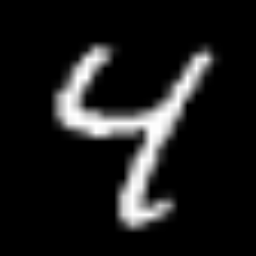

In [68]:

img , lab = next(val_iter)
imgtoshow = img.squeeze()
imgtoshow = imgtoshow * 0.5 + 0.5
imgtoshow = imgtoshow * 255

image_array = imgtoshow.byte().numpy()

image = Image.fromarray(image_array)
image = image.resize((256, 256), Image.BILINEAR)

image


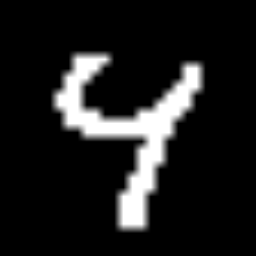

In [69]:
imggpu = img.to("cuda")
reconstructed, _, _ = model(imggpu)
imgtoshow = reconstructed.squeeze()
imgtoshow = imgtoshow * 0.5 + 0.5

imgtoshow = torch.where(imgtoshow < 0.5, torch.tensor(0), imgtoshow)
imgtoshow = torch.where(imgtoshow > 0.5, torch.tensor(255), imgtoshow)


image_array = imgtoshow.cpu().byte().numpy()

image = Image.fromarray(image_array)
image = image.resize((256, 256), Image.BILINEAR)

image


In [70]:

from dataset import AnimalDataset
import os
test_list = os.path.join('/home/mt0/22CS60R54/image_regen/dataset_list', "val.txt")
test_dataset = AnimalDataset(data_list=test_list, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=1)


In [71]:
from PIL import Image
test_iter = iter(test_loader)

torch.Size([3, 256, 256])


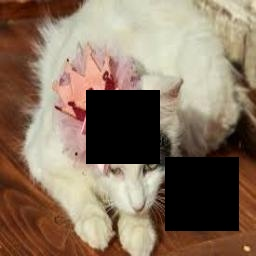

In [96]:

mimg , umimg = next(test_iter)
imgtoshow = mimg.squeeze()
print(imgtoshow.shape)

imgtoshow = imgtoshow * 0.5 + 0.5
imgtoshow = imgtoshow * 255
image_array = imgtoshow.byte().numpy()
image_array = image_array.transpose(1, 2, 0)


image = Image.fromarray(image_array)

image

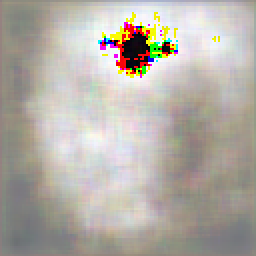

In [97]:
model = torch.load('modelcolor.h5')
imggpu = umimg.to("cuda")
reconstructed, _, _ = model(imggpu)
imgtoshow = reconstructed.squeeze()
imgtoshow = imgtoshow * 0.5 + 0.5
imgtoshow = imgtoshow * 255


image_array = imgtoshow.cpu().byte().numpy()
image_array = image_array.transpose(1, 2, 0)

image = Image.fromarray(image_array)

image